In [4]:
import pandas as pd

In [5]:
uselog = pd.read_csv("data/use_log.csv")
customer = pd.read_csv("data/customer_master.csv")
class_master = pd.read_csv("data/class_master.csv")
campaign_master = pd.read_csv("data/campaign_master.csv")

In [6]:
customer_join = pd.merge(customer,class_master,on="class",how="left")
customer_join = pd.merge(customer_join,campaign_master,on="campaign_id",how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [7]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [8]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [9]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [10]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [11]:
customer_join["end_date"]=pd.to_datetime(customer_join["end_date"])

In [12]:
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]

customer_newer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2953 entries, 0 to 4191
Data columns (total 11 columns):
customer_id      2953 non-null object
name             2953 non-null object
class            2953 non-null object
gender           2953 non-null object
start_date       2953 non-null object
end_date         111 non-null datetime64[ns]
campaign_id      2953 non-null object
is_deleted       2953 non-null int64
class_name       2953 non-null object
price            2953 non-null int64
campaign_name    2953 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 276.8+ KB


In [13]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [15]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["useyear"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["useyear","customer_id"],as_index=False).count()
uselog_months.head()

,useyear,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7


In [16]:
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,useyear,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [20]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean","median","max","min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


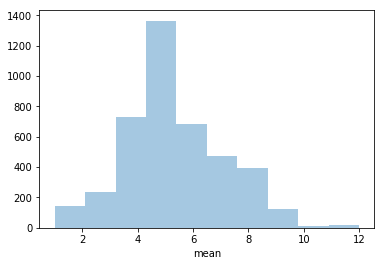

In [29]:
import seaborn as sns
sns.distplot(uselog_customer["mean"], kde=False, bins=10) 

In [39]:
uselog["weekday"]=uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "useyear"], as_index=False).count()[["customer_id","useyear","weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,useyear,weekday,count
0,AS002855,201804,4,4
1,AS002855,201805,5,5
2,AS002855,201806,5,5
3,AS002855,201807,5,5
4,AS002855,201808,3,3
